# *************************************************************
#Pontifícia Universidade Católica de Minas Gerais - PUC-Minas
# Pós Graduação em Ciência de Dados e Big Data
# Trabalho de Conclusão de Curso
## Um Modelo de Aprendizado de Máquina Supervisionado para Previsão de Quantidade de Público nos Jogos do Campeonato Brasileiro de Futebol

## Autor: Salomão Fernandes de Freitas Júnior
## DEZEMBRO/2023


## ETAPA 1: Análise Exploratória do Dados

### Instalação do Pacote sweetviz

In [7]:
!pip install sweetviz

### Importação de Bibliotecas e Leitura de datasets





In [8]:
# Importação de Bibliotecas
import pandas as pd
import sweetviz as sv



In [9]:
# Leitura do dataset
# Este dataset contém dados de 29/03/2003 a 26/10/2023, obtidos em https://basedosdados.org/dataset/c861330e-bca2-474d-9073-bc70744a1b23?table=18835b0d-233e-4857-b454-1fa34a81b4fa
# Os demais dados (27/10/2023 a 07/12/2023) preenchemos com dados obtidos em https://www.srgoool.com.br/
# Inicialmente, vamos analisar somente os dados do datset obtido em basedosdados

df_brasileirao = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PUC Minas - TCC Ciência de Dados/Datasets/entrada/brasileirao_serie_a.csv', sep= ';')



### Inciando a exploração dos dados

In [10]:
# Exibindo algumas linhas do df para visualização
#df_brasileirao.sample(10)
df_brasileirao.head()

,ano_campeonato,data,rodada,estadio,arbitro,publico,publico_max,time_mandante,time_visitante,tecnico_mandante,...,chutes_bola_parada_mandante,chutes_bola_parada_visitante,defesas_mandante,defesas_visitante,impedimentos_mandante,impedimentos_visitante,chutes_mandante,chutes_visitante,chutes_fora_mandante,chutes_fora_visitante
0,2017,21/05/2017,2,Arena Condá,André Luiz de Freitas Castro,10323.0,22600.0,Chapecoense,Palmeiras,Vágner Mancini,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017,30/05/2017,3,Arena Condá,Marcelo de Lima Henrique,6188.0,22600.0,Chapecoense,Avaí FC,Vágner Mancini,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017,09/06/2017,5,Arena Condá,Rodolpho Toski Marques,14403.0,22600.0,Chapecoense,Grêmio,Vágner Mancini,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017,15/06/2017,7,Arena Condá,Jailson Macedo Freitas,10033.0,22600.0,Chapecoense,Vasco da Gama,Vágner Mancini,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017,18/06/2017,8,Arena Condá,Marcelo Aparecido Ribeiro de Souza,11603.0,22600.0,Chapecoense,Botafogo,Vágner Mancini,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Verificamos agora todos os nomes das colunas e seus tipos reconhecidos
df_brasileirao.dtypes

ano_campeonato                      int64
data                               object
rodada                              int64
estadio                            object
arbitro                            object
publico                           float64
publico_max                       float64
time_mandante                      object
time_visitante                     object
tecnico_mandante                   object
tecnico_visitante                  object
colocacao_mandante                float64
colocacao_visitante               float64
valor_equipe_titular_mandante     float64
valor_equipe_titular_visitante    float64
idade_media_titular_mandante      float64
idade_media_titular_visitante     float64
gols_mandante                     float64
gols_visitante                    float64
gols_1_tempo_mandante             float64
gols_1_tempo_visitante            float64
escanteios_mandante               float64
escanteios_visitante              float64
faltas_mandante                   

In [12]:
#Selecionando somente as colunas de interesse
col_interesse = ['ano_campeonato', 'data', 'rodada', 'publico', 'time_mandante', 'time_visitante', 'colocacao_mandante', 'colocacao_visitante',
                 'valor_equipe_titular_mandante', 'valor_equipe_titular_visitante', 'gols_mandante', 'gols_visitante']

df_brasileirao = df_brasileirao[col_interesse]
#df_brasileirao.head()
df_brasileirao.sample(10)


,ano_campeonato,data,rodada,publico,time_mandante,time_visitante,colocacao_mandante,colocacao_visitante,valor_equipe_titular_mandante,valor_equipe_titular_visitante,gols_mandante,gols_visitante
7981,2011,10/07/2011,9,32157.0,EC Bahia,Botafogo,14.0,5.0,3750000.0,14250000.0,1.0,1.0
3026,2009,10/05/2009,1,2517.0,Goiás EC,Náutico,7.0,6.0,8350000.0,6500000.0,3.0,3.0
4915,2010,22/05/2010,3,18365.0,Palmeiras,Grêmio,7.0,15.0,NaN,NaN,4.0,2.0
5383,2003,10/10/2003,35,NaN,Internacional,Criciúma EC,NaN,NaN,NaN,NaN,2.0,0.0
3071,2009,01/11/2009,33,8748.0,Goiás EC,Atlético-MG,8.0,3.0,11700000.0,15700000.0,2.0,3.0
6738,2022,24/04/2022,3,3920.0,Juventude,Cuiabá-MT,16.0,11.0,7800000.0,8500000.0,0.0,1.0
6907,2022,02/10/2022,29,9898.0,Goiás,Fortaleza,11.0,14.0,11880000.0,14250000.0,0.0,1.0
6866,2022,20/08/2022,23,31650.0,Atlético-MG,Goiás,7.0,13.0,66900000.0,10150000.0,0.0,1.0
3641,2019,15/09/2019,19,18966.0,Atlético-MG,Internacional,8.0,6.0,16300000.0,18200000.0,1.0,3.0
3158,2012,19/07/2012,10,7413.0,Fluminense,EC Bahia,3.0,17.0,30750000.0,5850000.0,4.0,0.0


### Usando o pacote sweetviz para uma Análise Exploratória Padrão

In [13]:
# FAZ UMA ANÁLISE EXPLORATÓRIA AUTOMÁTICA, DE MANEIRA RÁPIDA (OBVIAMENTE LIMITADA, MAS ÚTIL PARA PRIMEIRO CONHECIMENTO)
eda = sv.analyze(source = df_brasileirao) #, target_feat = 'publico' )

                                             |          | [  0%]   00:00 -> (? left)


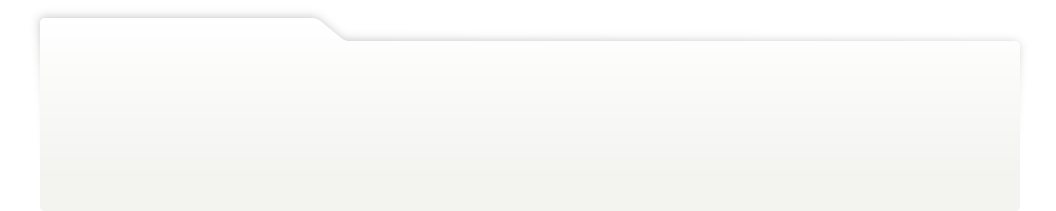
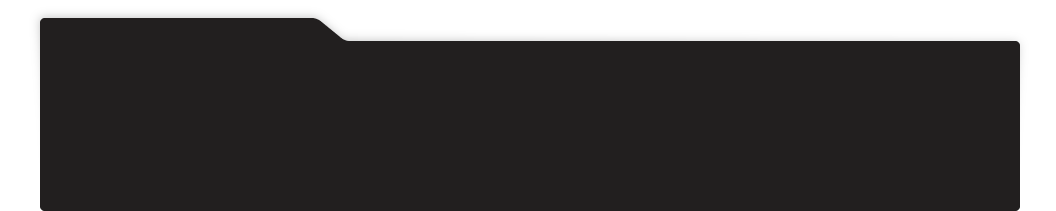
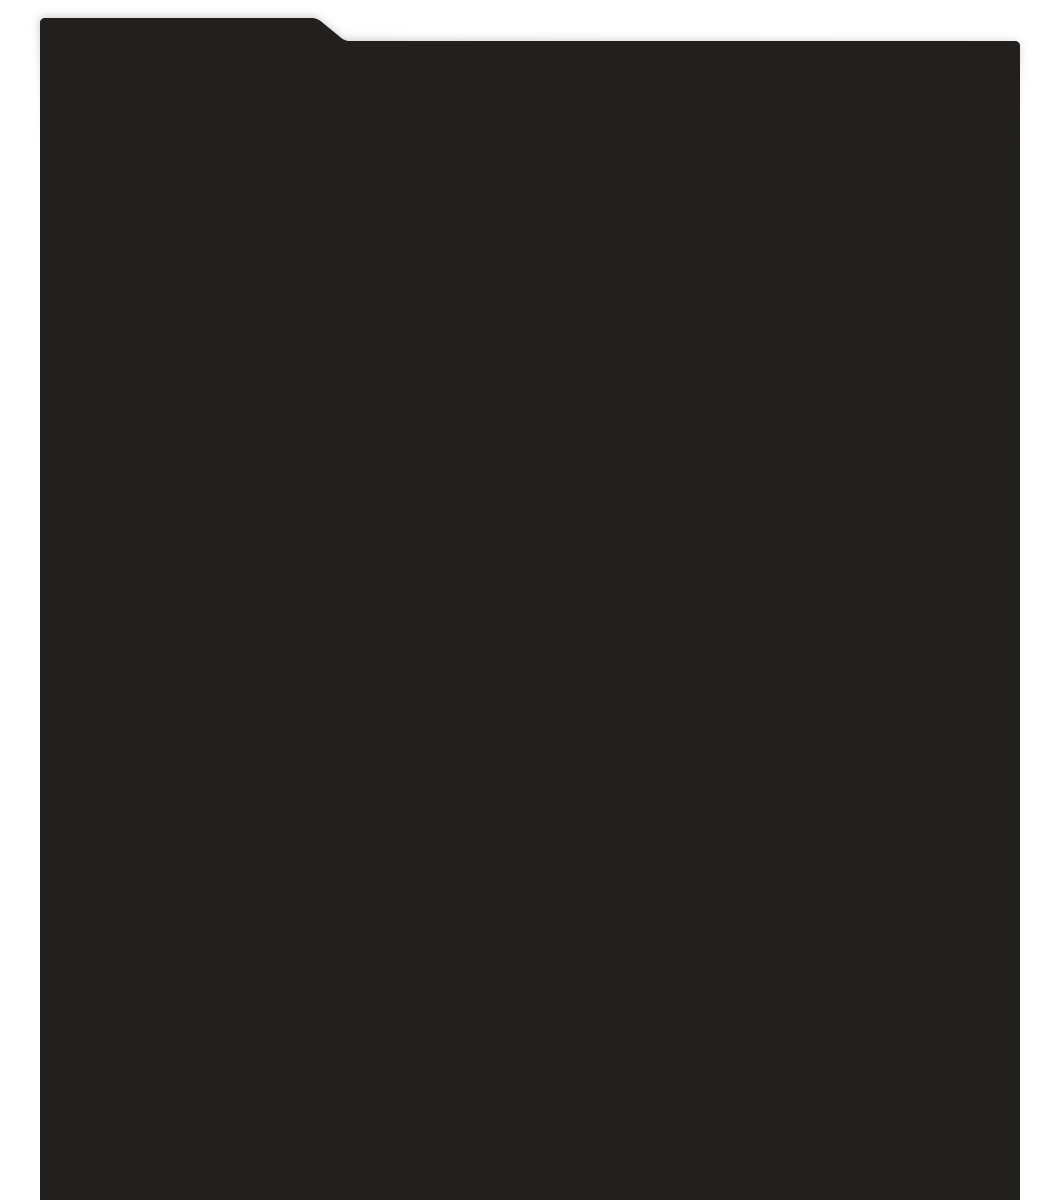
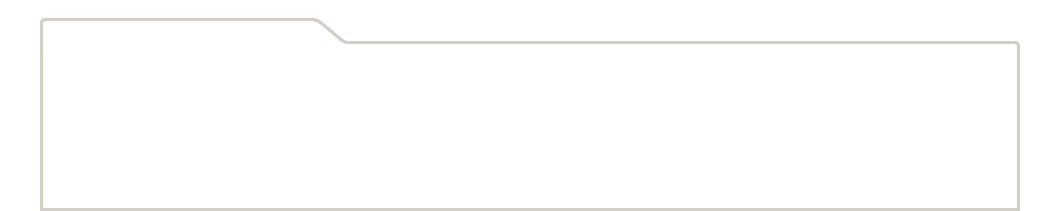
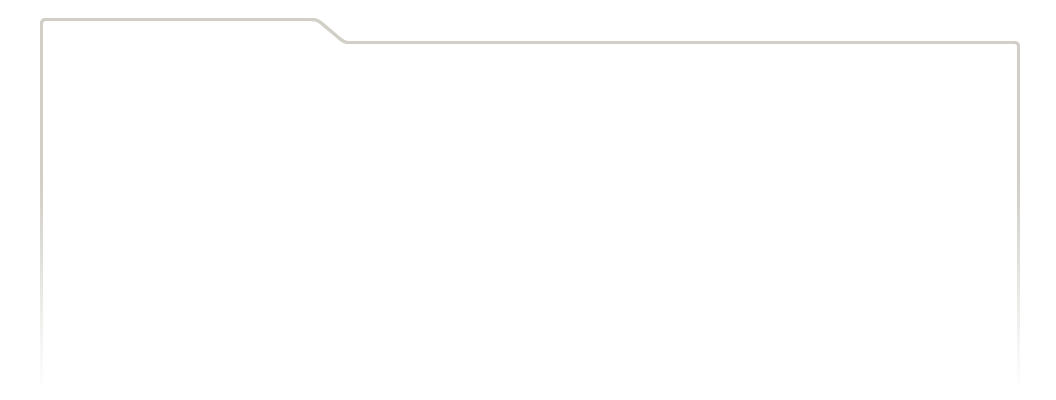
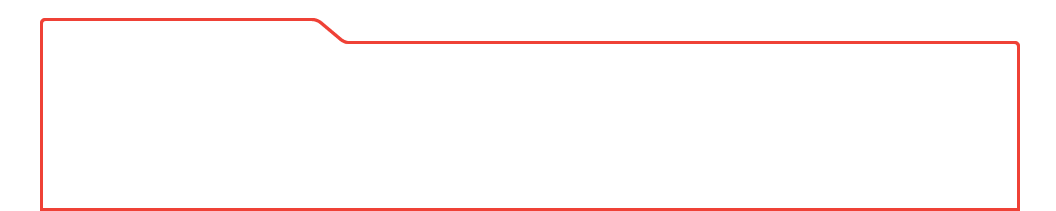
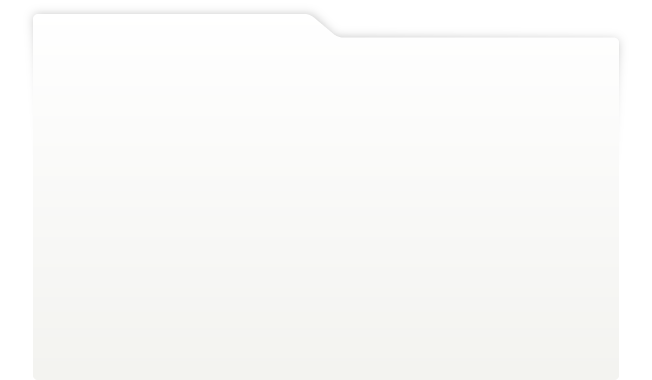
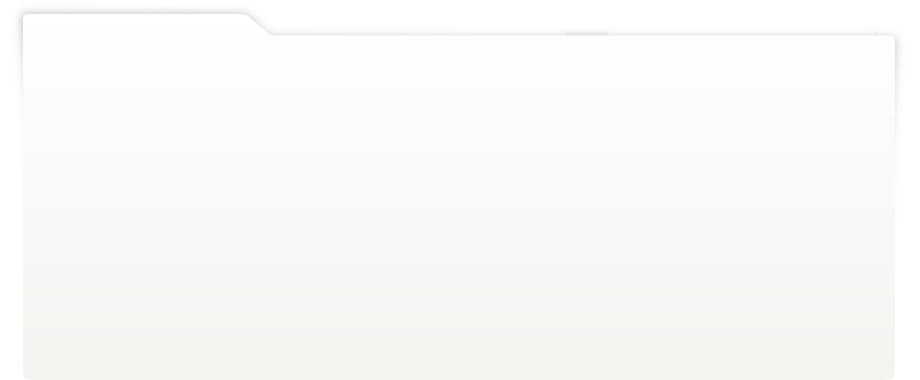
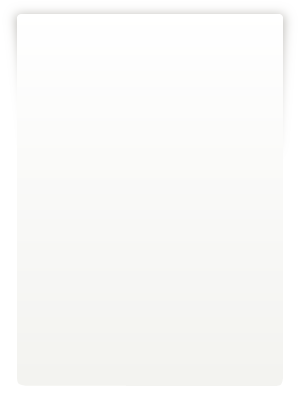
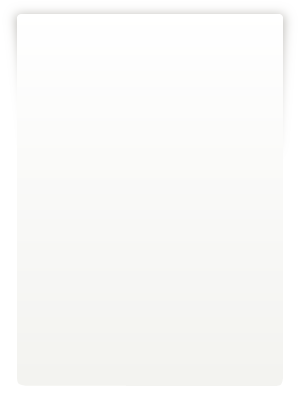
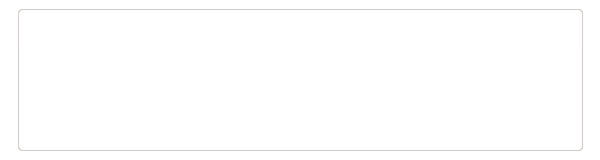
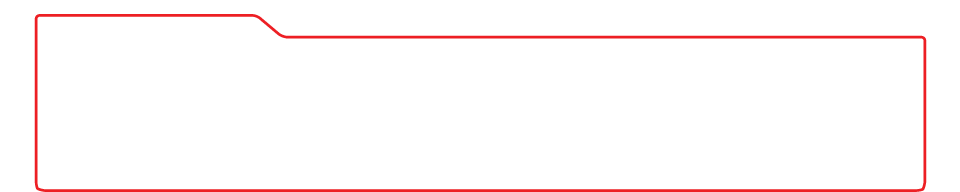
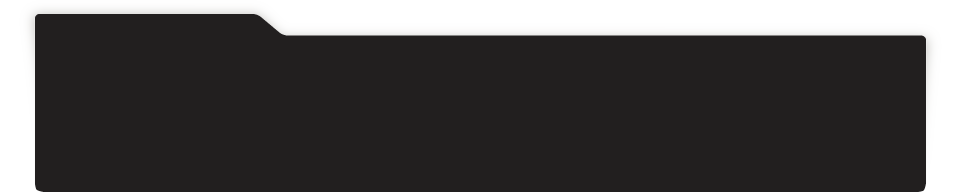
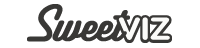
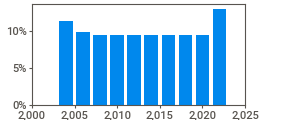
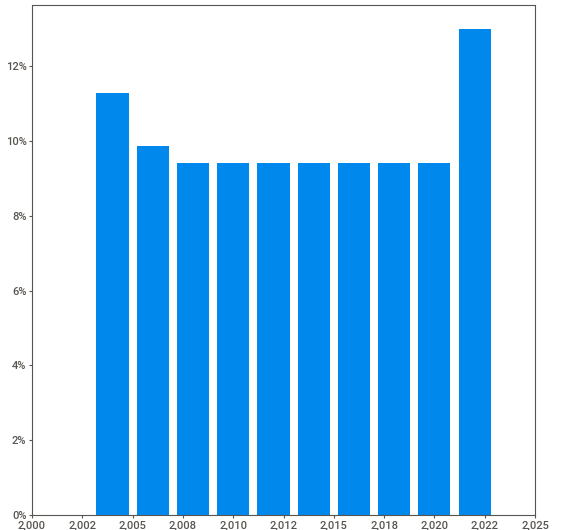
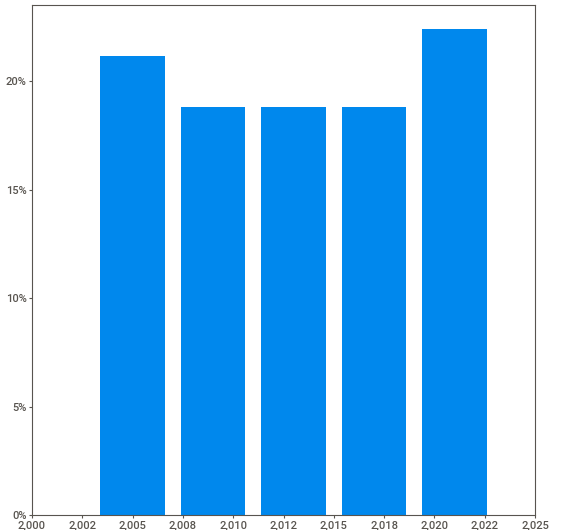
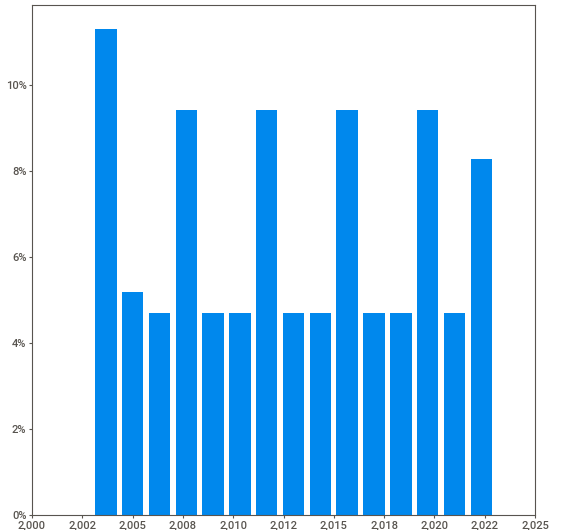
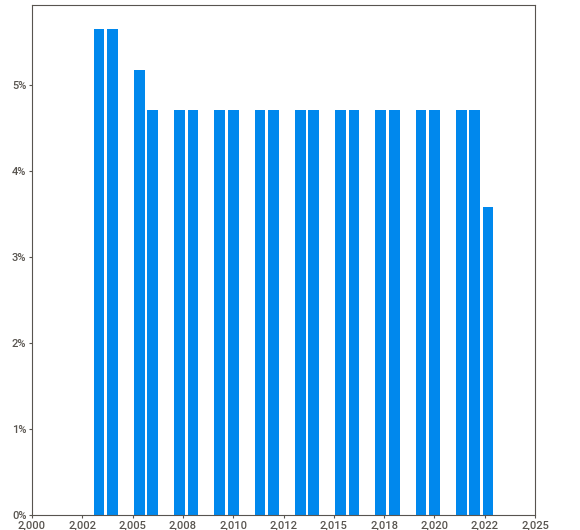
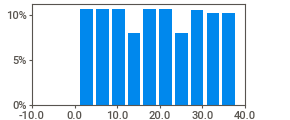
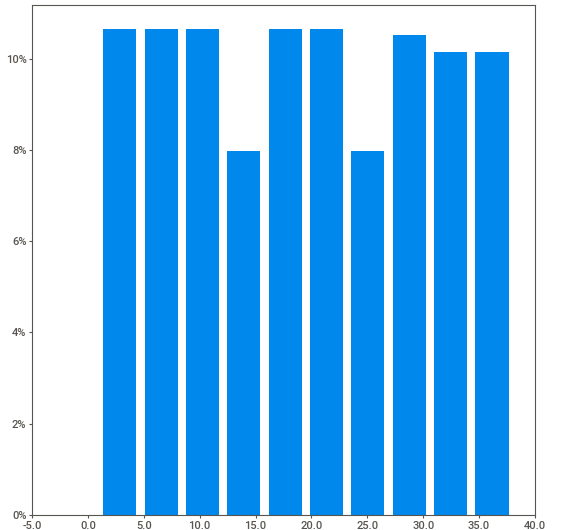
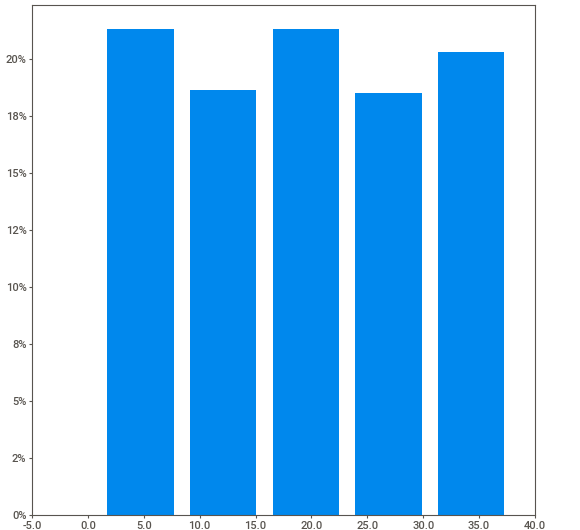
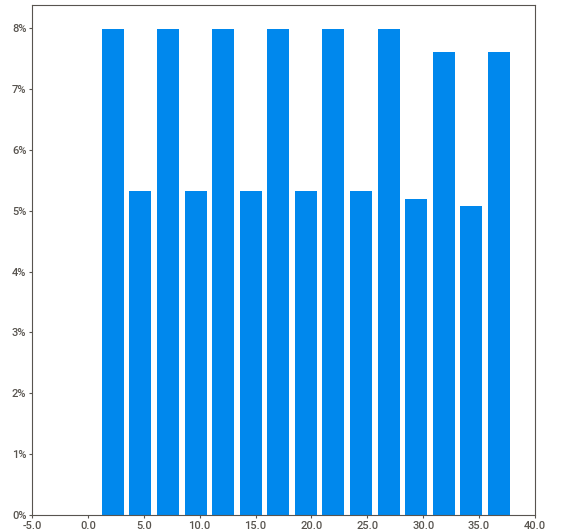
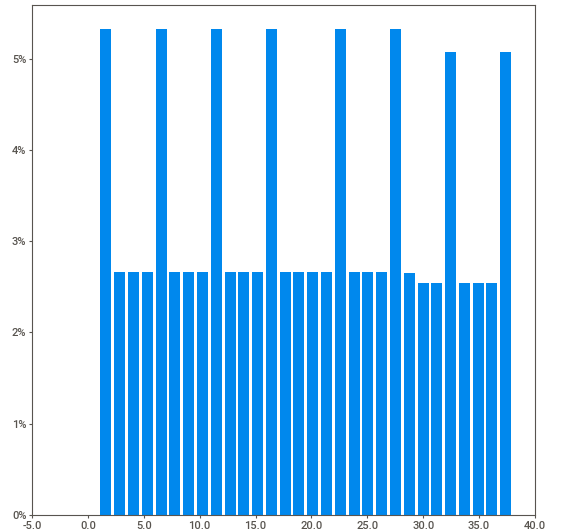
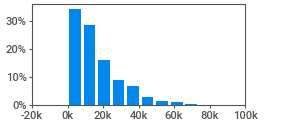
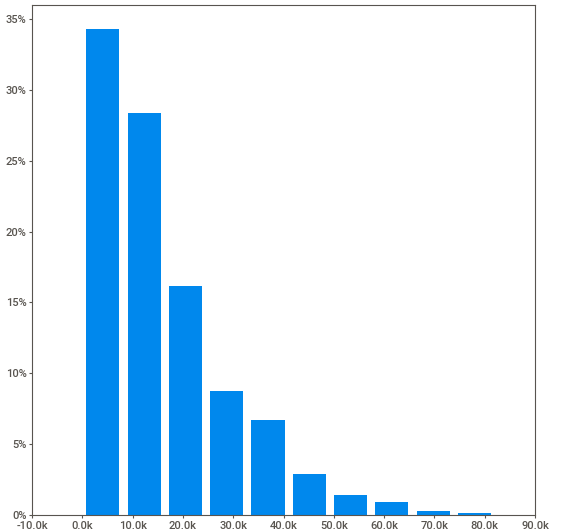
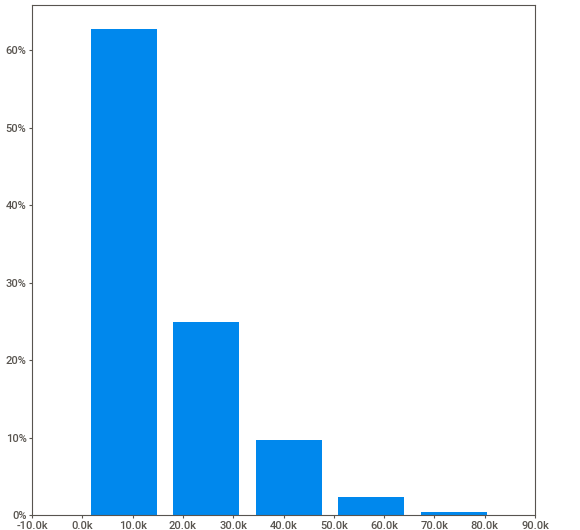
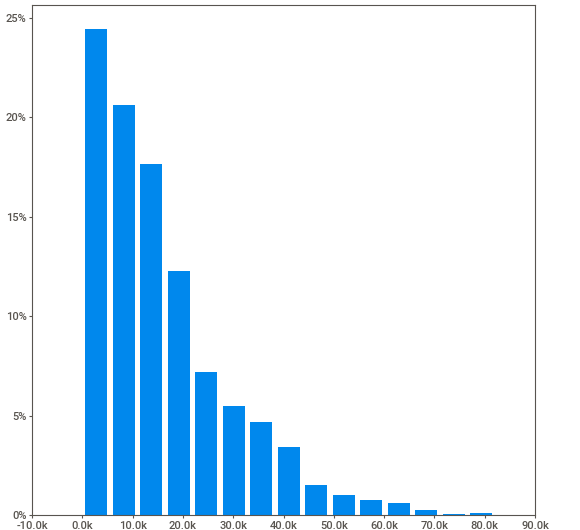
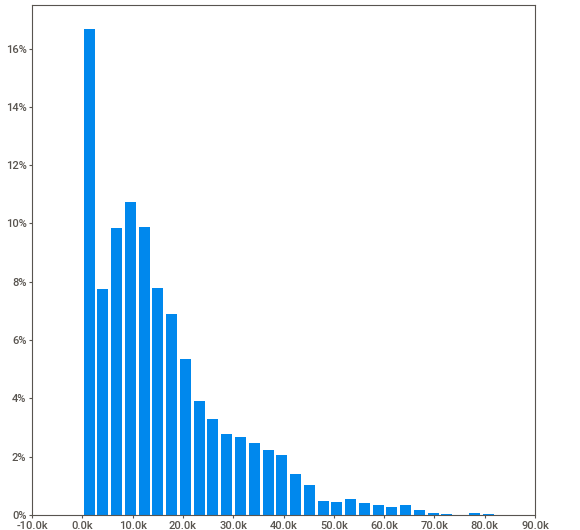
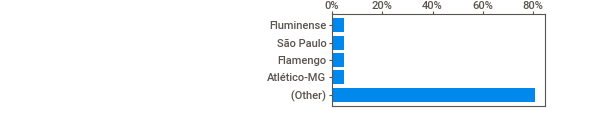
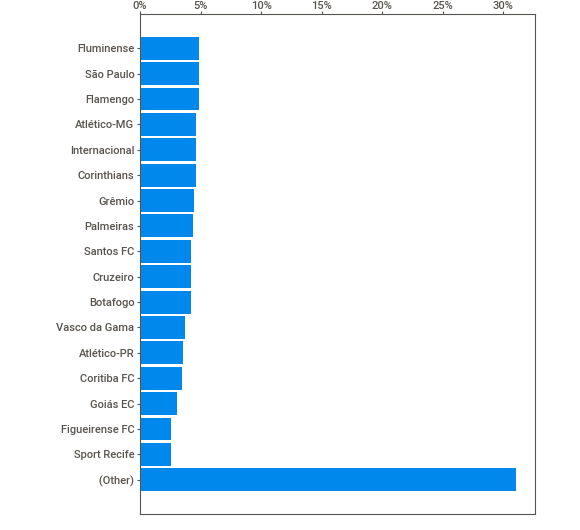
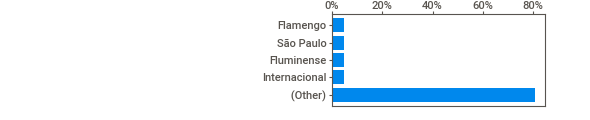
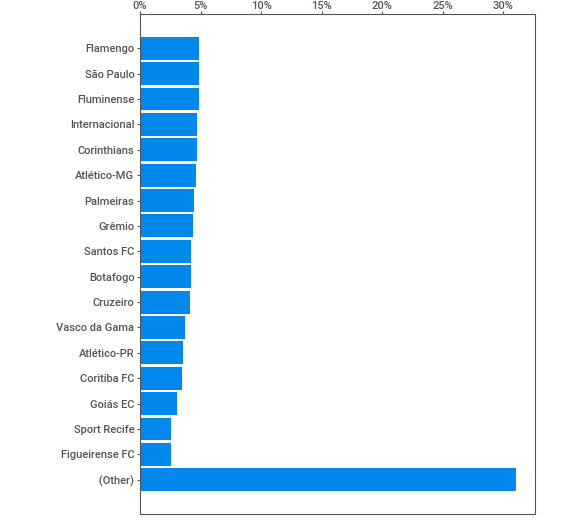
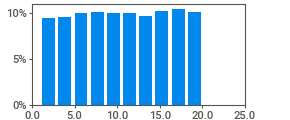
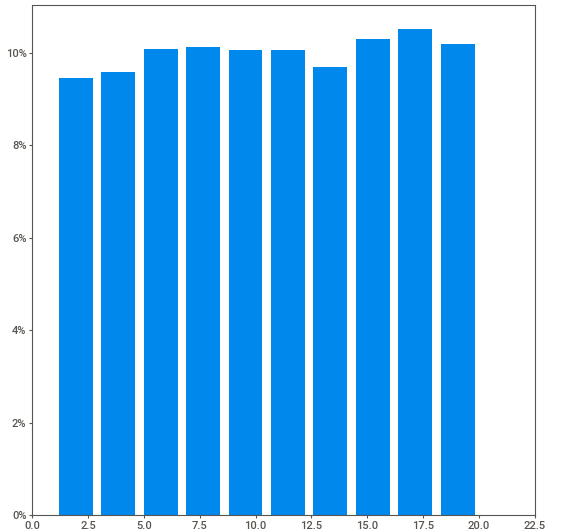
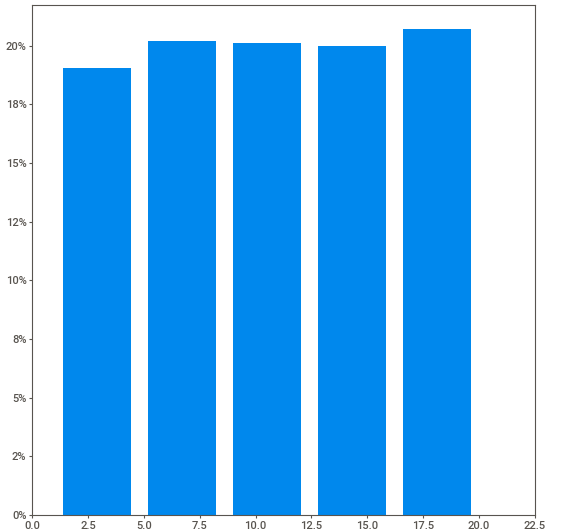
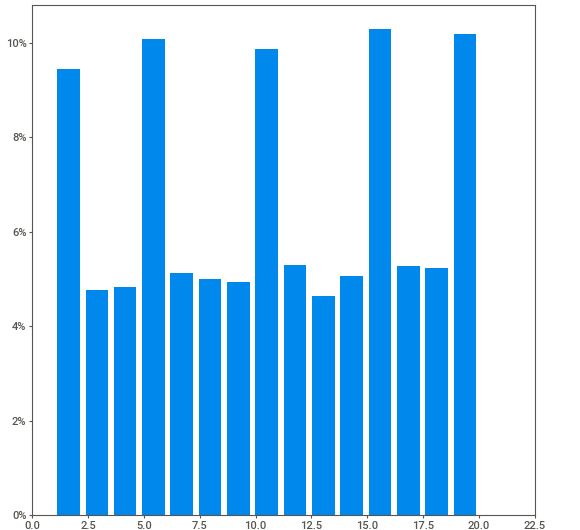
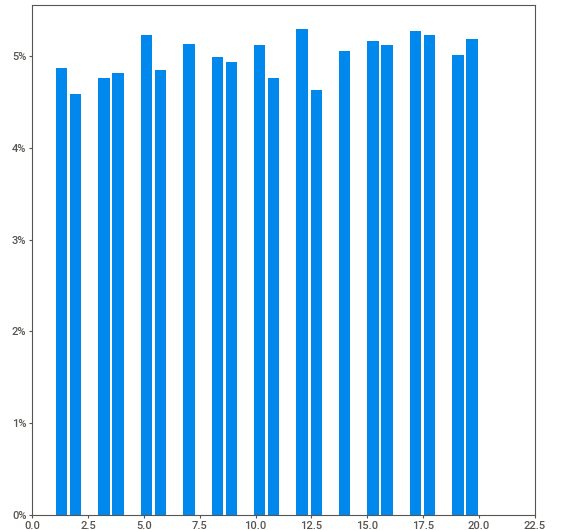
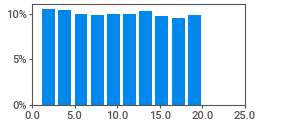
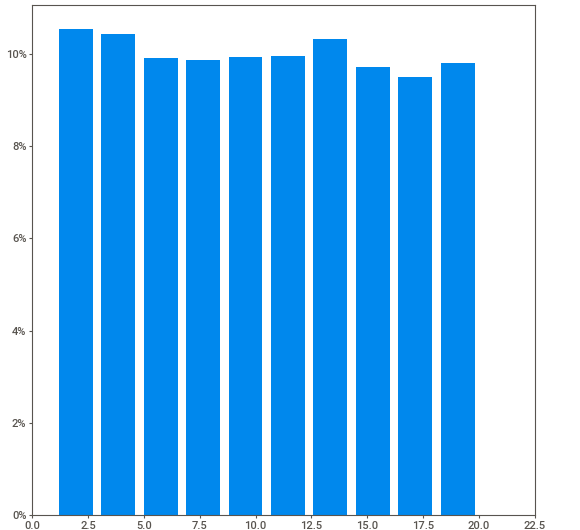
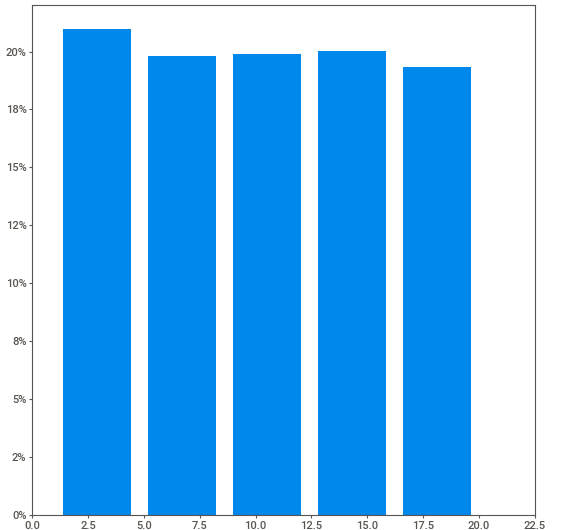
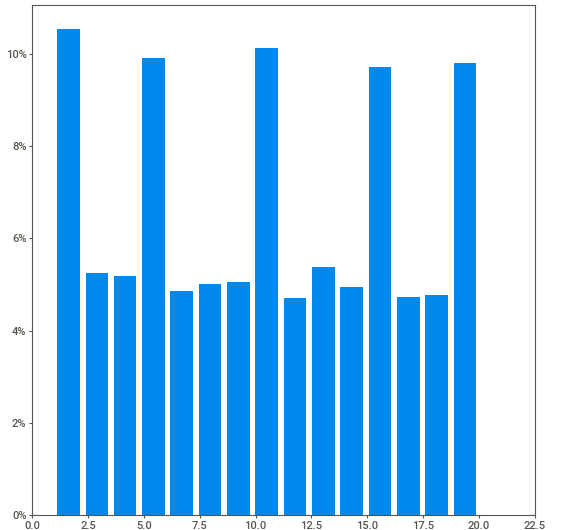
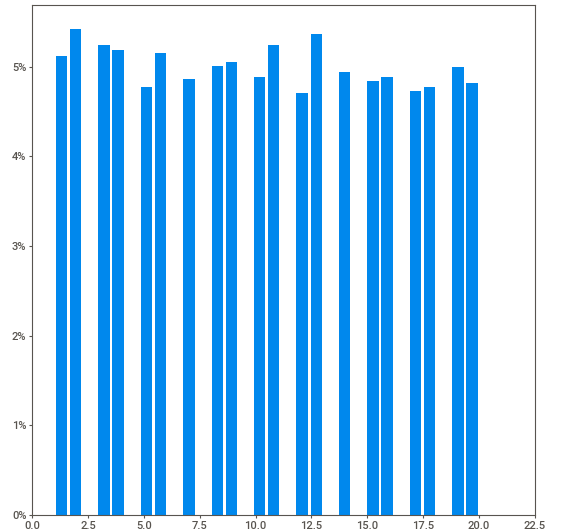
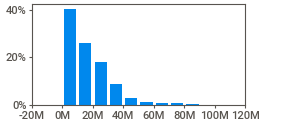
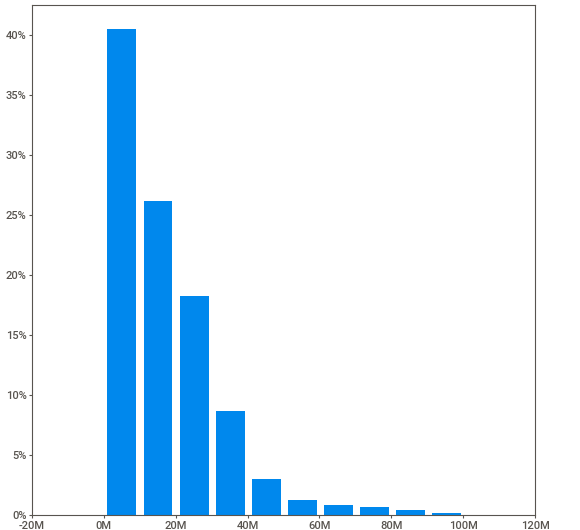
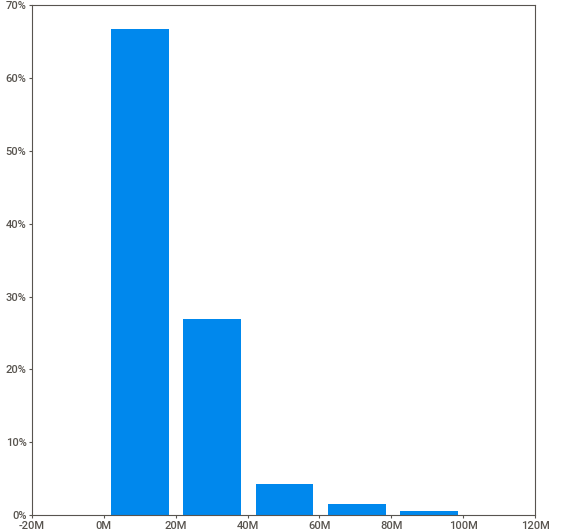
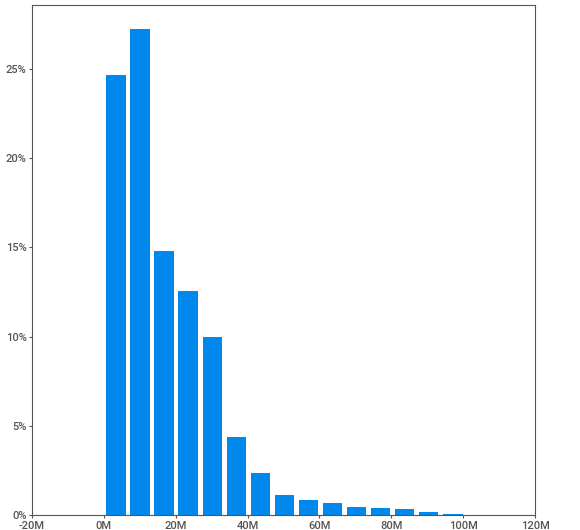
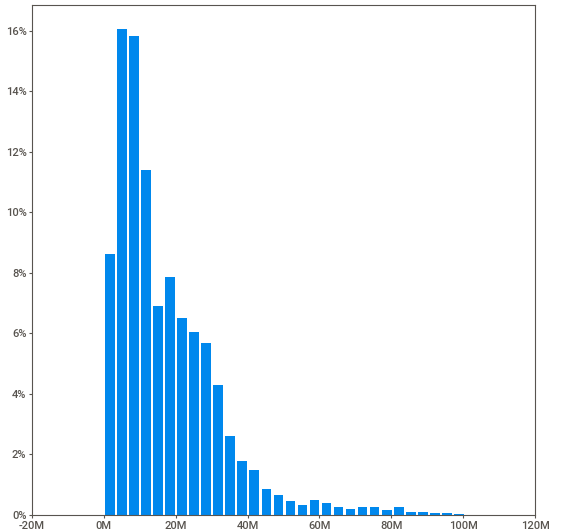
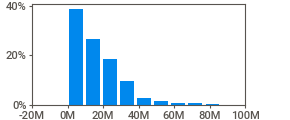
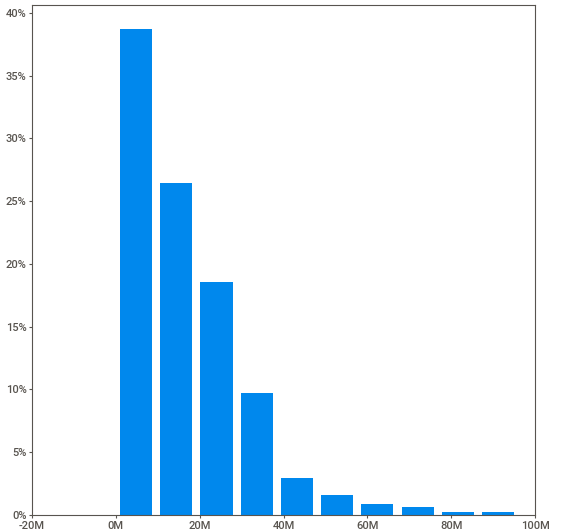
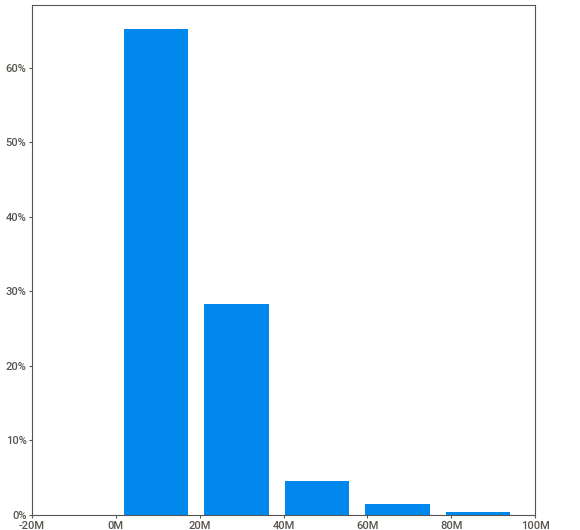
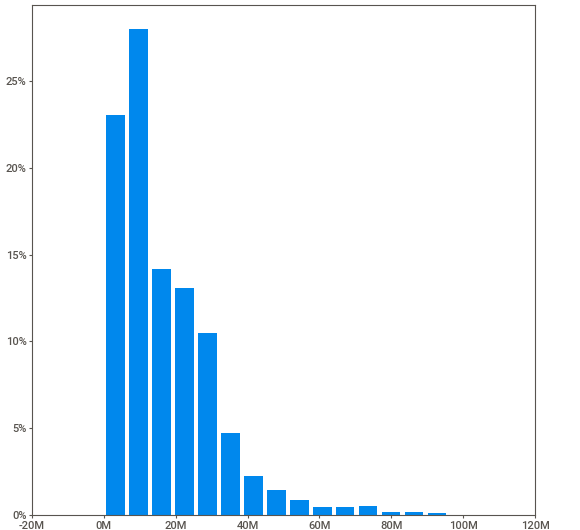
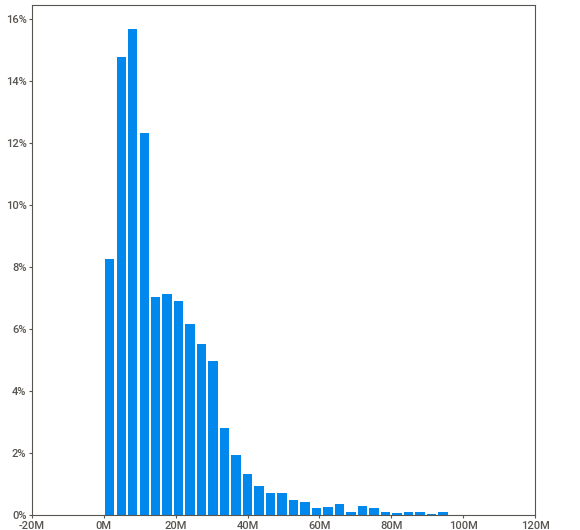
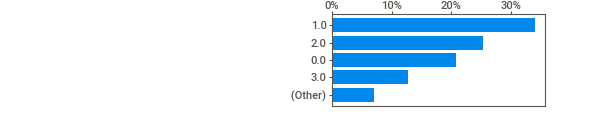
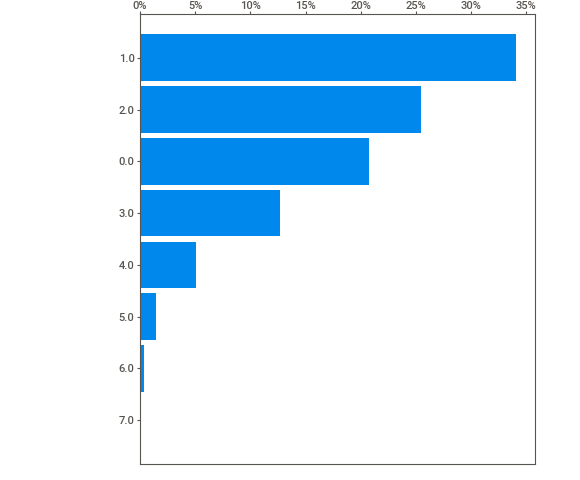
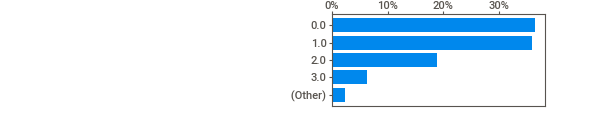
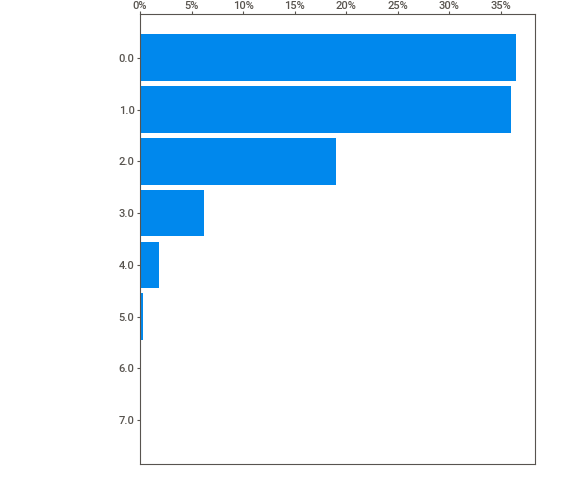
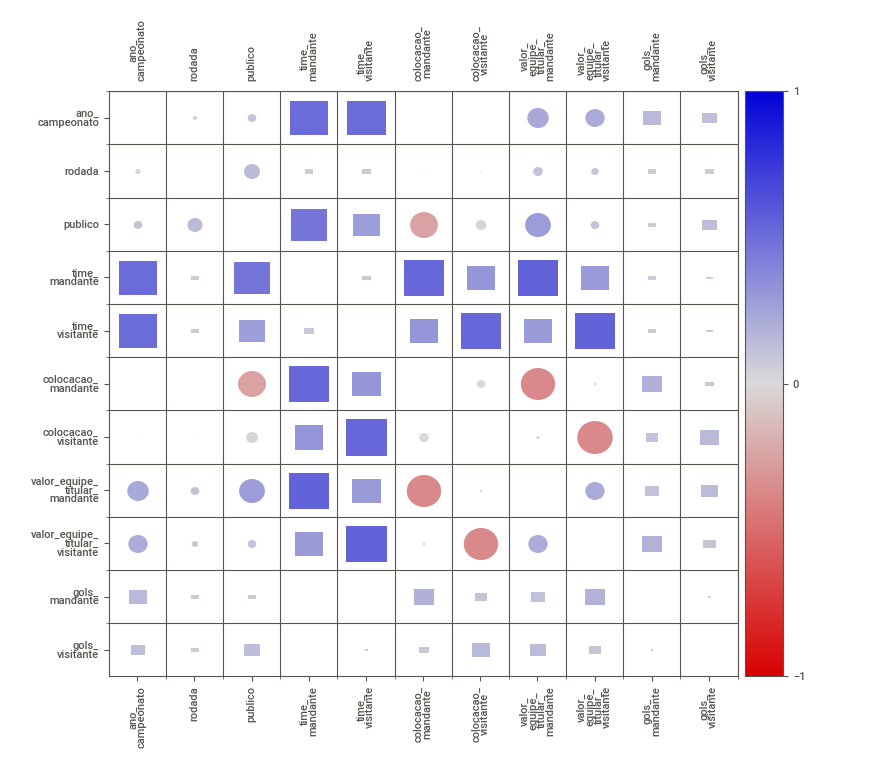
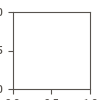

In [14]:
eda.show_notebook()

**OBS: Pela análise exploratória acima, já podemos observar que alguns atributos apresentam dados faltantes. Na fase de Preparação da base de dados, vamos ter que analisar individualmente para decidir pelo preenchimento ou exclusão dessas linhas.**

### Explorando mais detalhadamente os dados

In [15]:
# Verificando os tipos de dados reconhecidos, total de linhas do dataset
# quantidades de não nulos em cada coluna
df_brasileirao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8079 entries, 0 to 8078
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ano_campeonato                  8079 non-null   int64  
 1   data                            8079 non-null   object 
 2   rodada                          8079 non-null   int64  
 3   publico                         6368 non-null   float64
 4   time_mandante                   8079 non-null   object 
 5   time_visitante                  8079 non-null   object 
 6   colocacao_mandante              6369 non-null   float64
 7   colocacao_visitante             6369 non-null   float64
 8   valor_equipe_titular_mandante   5981 non-null   float64
 9   valor_equipe_titular_visitante  5981 non-null   float64
 10  gols_mandante                   8078 non-null   float64
 11  gols_visitante                  8078 non-null   float64
dtypes: float64(7), int64(2), object(3)

In [16]:
# Estatística descritiva das variáveis numéricas
df_brasileirao.describe()

,ano_campeonato,rodada,publico,colocacao_mandante,colocacao_visitante,valor_equipe_titular_mandante,valor_equipe_titular_visitante,gols_mandante,gols_visitante
count,8079.000000,8079.000000,6368.000000,6369.000000,6369.000000,5.981000e+03,5.981000e+03,8078.000000,8078.000000
mean,2012.670999,19.337294,15548.533134,10.630711,10.371016,1.716411e+07,1.673819e+07,1.535157,1.021664
std,6.082025,10.916278,13677.813939,5.756188,5.773987,1.458502e+07,1.396350e+07,1.224645,1.021328
min,2003.000000,1.000000,0.000000,1.000000,1.000000,5.600000e+02,5.930000e+02,0.000000,0.000000
25%,2007.000000,10.000000,5684.000000,6.000000,5.000000,6.800000e+06,6.800000e+06,1.000000,0.000000
50%,2013.000000,19.000000,12286.500000,11.000000,10.000000,1.270000e+07,1.255000e+07,1.000000,1.000000
75%,2018.000000,29.000000,21916.250000,16.000000,15.000000,2.470000e+07,2.375000e+07,2.000000,2.000000
max,2023.000000,38.000000,82044.000000,20.000000,20.000000,1.005000e+08,9.600000e+07,7.000000,7.000000


In [17]:
# series pandas com os tipos de dados das colunas
df_brasileirao.dtypes

ano_campeonato                      int64
data                               object
rodada                              int64
publico                           float64
time_mandante                      object
time_visitante                     object
colocacao_mandante                float64
colocacao_visitante               float64
valor_equipe_titular_mandante     float64
valor_equipe_titular_visitante    float64
gols_mandante                     float64
gols_visitante                    float64
dtype: object

In [18]:
# os índices são os nomes das colunas
df_brasileirao.dtypes.index

Index(['ano_campeonato', 'data', 'rodada', 'publico', 'time_mandante',
       'time_visitante', 'colocacao_mandante', 'colocacao_visitante',
       'valor_equipe_titular_mandante', 'valor_equipe_titular_visitante',
       'gols_mandante', 'gols_visitante'],
      dtype='object')

In [19]:
# Separando as variáveis e qualitativas das quantitativas
# (Nesse projeto seria simples fazer manualmente, mas a intenção é deixar um modelo completo para projetos futuros)

# Criando duas listas com nomes das colunas, uma para colunas qualitativas e outra para quantitativas
quali = []
quanti = []

for col in df_brasileirao.dtypes.index:
  if df_brasileirao.dtypes[col] == 'object':
    quali.append(col)
  else:
    quanti.append(col)

print('Lista Quanti: ',quanti)
print('Lista Quali: ',quali)




Lista Quanti:  ['ano_campeonato', 'rodada', 'publico', 'colocacao_mandante', 'colocacao_visitante', 'valor_equipe_titular_mandante', 'valor_equipe_titular_visitante', 'gols_mandante', 'gols_visitante']
Lista Quali:  ['data', 'time_mandante', 'time_visitante']


In [20]:
# Estatística Descritiva para variáveis quantitativas (numéricas)
# e Tabelas de Frequência para variáveis qualitatvas (categóricas)

# Vamos criar um dataframe para as variáveis quanti para fazermos estatística descritiva

df_quanti = df_brasileirao[quanti]
display(df_quanti)

,ano_campeonato,rodada,publico,colocacao_mandante,colocacao_visitante,valor_equipe_titular_mandante,valor_equipe_titular_visitante,gols_mandante,gols_visitante
0,2017,2,10323.0,11.0,2.0,12050000.0,21500000.0,1.0,0.0
1,2017,3,6188.0,6.0,17.0,12050000.0,6550000.0,2.0,0.0
2,2017,5,14403.0,1.0,3.0,12050000.0,28300000.0,3.0,6.0
3,2017,7,10033.0,4.0,11.0,12050000.0,9600000.0,2.0,1.0
4,2017,8,11603.0,4.0,12.0,12300000.0,10400000.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...
8074,2011,17,10278.0,1.0,16.0,24700000.0,5500000.0,1.0,4.0
8075,2011,12,12968.0,12.0,3.0,62900000.0,23850000.0,4.0,5.0
8076,2011,3,4541.0,13.0,17.0,2850000.0,14300000.0,2.0,4.0
8077,2011,12,23825.0,14.0,2.0,5700000.0,32700000.0,3.0,4.0


In [21]:
# Estatística Descritiva
# Na verdade um describe sobre o df inteiro, ele mesmo já reconhece quais são as variáveis quantitativas
# e apresenta a estatística descritiva somente destas (como vemos mais no início deste notebook)

df_quanti.describe()

,ano_campeonato,rodada,publico,colocacao_mandante,colocacao_visitante,valor_equipe_titular_mandante,valor_equipe_titular_visitante,gols_mandante,gols_visitante
count,8079.000000,8079.000000,6368.000000,6369.000000,6369.000000,5.981000e+03,5.981000e+03,8078.000000,8078.000000
mean,2012.670999,19.337294,15548.533134,10.630711,10.371016,1.716411e+07,1.673819e+07,1.535157,1.021664
std,6.082025,10.916278,13677.813939,5.756188,5.773987,1.458502e+07,1.396350e+07,1.224645,1.021328
min,2003.000000,1.000000,0.000000,1.000000,1.000000,5.600000e+02,5.930000e+02,0.000000,0.000000
25%,2007.000000,10.000000,5684.000000,6.000000,5.000000,6.800000e+06,6.800000e+06,1.000000,0.000000
50%,2013.000000,19.000000,12286.500000,11.000000,10.000000,1.270000e+07,1.255000e+07,1.000000,1.000000
75%,2018.000000,29.000000,21916.250000,16.000000,15.000000,2.470000e+07,2.375000e+07,2.000000,2.000000
max,2023.000000,38.000000,82044.000000,20.000000,20.000000,1.005000e+08,9.600000e+07,7.000000,7.000000


In [22]:
# Se quiséssemos Calcular a Mediana separadamente
# Mas ela corresponde ao 2º quartil (50%) da tabela anterior

df_quanti.median()

ano_campeonato                        2013.0
rodada                                  19.0
publico                              12286.5
colocacao_mandante                      11.0
colocacao_visitante                     10.0
valor_equipe_titular_mandante     12700000.0
valor_equipe_titular_visitante    12550000.0
gols_mandante                            1.0
gols_visitante                           1.0
dtype: float64

In [23]:
# Tabela de frequência para  as variáveis qualitativas
# Criando o df_quali

df_quali = df_brasileirao[quali]

# Fazendo a tabela de frequência para a variável data

#df_quali.groupby('data').count()
#df_freq = pd.DataFrame(df_quali['time_mandante'].value_counts()) #já dá o resultado em DF. Senão vem em series (pois tem apenas um coluna)
#df_freq = df_quali['time_mandante'].value_counts().to_frame() #já dá o resultado em DF. Senão vem em series (pois tem apenas um coluna)
#df_freq = df_quali['time_mandante'].value_counts().reset_index().rename(columns={'index': 'time_mandante', 'time_mandante': 'count'})

df_freq = df_quali['data'].value_counts() # resultado é um series



display(df_freq)

data
21/07/2004    12
14/07/2004    12
21/08/2003    10
26/06/2016    10
30/11/2008    10
              ..
24/09/2018     1
18/08/2018     1
05/11/2018     1
21/08/2018     1
08/06/2011     1
Name: count, Length: 1991, dtype: int64

In [25]:
# Fazendo todas as tabelas de frequência de uma vez só
# De novo aqui, seria muito fácil fazer manualmente
# Mas nossa intenção é deixar um modelo completo (um gabarito) para usar em projetos futuros

# Vamos desconsiderar a variável data, pois não é relevante a sua frequência

for col in df_quali.columns:
    if col == 'data':
        pass
    else:
        print('----------------------')
        print('Variável: ', col)
        #df_freq = df_quali[col].value_counts().reset_index().rename(columns={'index': col, col: 'count'}).sort_values([col])
        df_freq = df_quali[col].value_counts().reset_index().sort_values([col])
        display(df_freq)
        print('TOTAL DISTINCT DE {}: {}'.format(col, len(df_freq)))
        print('----------------------')

        #df2 = df.sort_values(['Country Name', 'Ano'])

----------------------
Variável:  time_mandante


,time_mandante,count
27,América-MG,109
42,América-RN,19
29,Athletico-PR,91
24,Atlético-GO,133
3,Atlético-MG,375
12,Atlético-PR,285
25,Avaí FC,133
38,Barueri,38
10,Botafogo,337
45,Brasiliense-DF,19


TOTAL DISTINCT DE time_mandante: 47
----------------------
----------------------
Variável:  time_visitante


,time_visitante,count
27,América-MG,110
44,América-RN,19
29,Athletico-PR,90
21,Atlético-GO,133
5,Atlético-MG,376
12,Atlético-PR,285
23,Avaí FC,133
39,Barueri,38
9,Botafogo,337
46,Brasiliense-DF,19


TOTAL DISTINCT DE time_visitante: 47
----------------------


OBS: Com as tabelas de frequência dos atributos time_mandante e time_visitante, pudemos perceber que os seguintes times aparecem duplicados, com nomes diferentes:

- Athletico-PR x Atlético-PR
- Goiás x Goiás EC
- Santos x Santos FC


Assim, na fase de preparação da base de dados, teremos que padronizar esses nomes.

Ao preencher os dados complementares (27/10/2024 a 07/12/2024), já utlizamos nomes padronizados (Athletico-PR, Goiás, Santos), como veremos a seguir:

In [27]:
# Dados complementares (27/10/2023 a 07/12/2023) preenchidos com dados obtidos em https://www.srgoool.com.br/
df_brasileirao_comp = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PUC Minas - TCC Ciência de Dados/Datasets/entrada/brasileirao_serie_a_dados_complementares_2023.csv', sep= ';')

df_brasileirao_comp = df_brasileirao_comp[col_interesse]

df_brasileirao_comp.sample(10)

,ano_campeonato,data,rodada,publico,time_mandante,time_visitante,colocacao_mandante,colocacao_visitante,valor_equipe_titular_mandante,valor_equipe_titular_visitante,gols_mandante,gols_visitante
81,2023,06/12/2023,38,793,Goiás,América-MG,18,20,NaN,NaN,1,0
84,2023,06/12/2023,38,36618,São Paulo,Flamengo,11,4,NaN,NaN,1,0
9,2023,18/11/2023,30,30144,Fortaleza,Cruzeiro,9,11,NaN,NaN,0,1
55,2023,26/11/2023,35,34474,Atlético-MG,Grêmio,4,5,NaN,NaN,3,0
88,2023,06/12/2023,38,0,Coritiba FC,Corinthians,19,13,NaN,NaN,0,2
13,2023,01/11/2023,31,15441,Internacional,América-MG,14,20,NaN,NaN,1,1
44,2023,12/11/2023,34,9869,RB Bragantino,Botafogo,5,2,NaN,NaN,2,2
57,2023,26/11/2023,35,22471,Internacional,RB Bragantino,11,6,NaN,NaN,1,0
32,2023,08/11/2023,33,1088,América-MG,Coritiba FC,20,19,NaN,NaN,0,3
56,2023,26/11/2023,35,34252,São Paulo,Cuiabá-MT,10,9,NaN,NaN,0,0


In [29]:
# Tabelas de frequencia
df_quali = df_brasileirao_comp[quali]

for col in df_quali.columns:
    if col == 'data':
        pass
    else:
        print('----------------------')
        print('Variável: ', col)
        #df_freq = df_quali[col].value_counts().reset_index().rename(columns={'index': col, col: 'count'}).sort_values([col])
        df_freq = df_quali[col].value_counts().reset_index().sort_values([col])
        display(df_freq)
        print('TOTAL DISTINCT DE {}: {}'.format(col, len(df_freq)))
        print('----------------------')

----------------------
Variável:  time_mandante


,time_mandante,count
10,América-MG,5
11,Athletico-PR,4
9,Atlético-MG,5
5,Botafogo,5
7,Corinthians,5
3,Coritiba FC,5
16,Cruzeiro,4
12,Cuiabá-MT,4
6,EC Bahia,5
0,Flamengo,6


TOTAL DISTINCT DE time_mandante: 20
----------------------
----------------------
Variável:  time_visitante


,time_visitante,count
13,América-MG,4
4,Athletico-PR,5
15,Atlético-MG,4
1,Botafogo,5
16,Corinthians,4
11,Coritiba FC,4
5,Cruzeiro,5
2,Cuiabá-MT,5
12,EC Bahia,4
19,Flamengo,3


TOTAL DISTINCT DE time_visitante: 20
----------------------


**OBS: Nos dados complementares, já sabíamos que os campos "valor_equipe_titular_mandante"	e "valor_equipe_titular_visitante", estavam nulos, pois não tínhamos essa informação disponível para preenchimento. Na etapa de Preparação da base de dados, iremos decidir por uma estratégia de preenchimento.**